# ELE 251 Assignment 3

<div style="border-left: 4px solid #0078D7; padding: 10px; background-color: #f3f9ff;">
  <h2 style="margin: 0;">Instruction</h2>
</div>

* The Final submussion must be .pdf
* Each student will have different numbers in the questions. Run the code cell to get your own numbers.
* All questions are in Zero Initial Condition.

In [1]:
# This code generates customized numbers for each student
# Run this code and input your "First name Last name"
# For example, Yue Cao
import hashlib

def generate_numbers(name, count=4):
    unique_numbers = set()
    counter = 0

    while len(unique_numbers) < count:
        unique_input = f"{name}{counter}"
        hash_value = hashlib.sha256(unique_input.encode()).hexdigest()
        number = int(hash_value, 16) % 90 + 10
        unique_numbers.add(number)
        counter += 1

    return list(unique_numbers)

student_name = input("Enter the student's name: ")
numbers = generate_numbers(student_name)

variables = {}
for i, num in enumerate(numbers):
    var_name = f"Constant{chr(65+i)}"
    variables[var_name] = num
    globals()[var_name] = num

for var_name, value in variables.items():
    print(f"{var_name} = {value}")

Enter the student's name:  Yue Cao


ConstantA = 56
ConstantB = 65
ConstantC = 19
ConstantD = 76


In [3]:
ConstantA = 56
ConstantB = 65
ConstantC = 19
ConstantD = 76


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

<div style="border-left: 4px solid #28a745; padding: 10px; background-color: #f9fff3; margin-top: 10px;">
  <h2 style="margin: 0;">Q 1: Impulse Response of 2nd Order System</h2>
</div>

Consider a 2nd order system in transfer function:

$$H(s) = \frac{20}{s^2+2\zeta\omega_n s+\omega_n^2}$$

* the denominator is with unknown damping ratio $\zeta$ and natural frequency $\omega_n$

Its unit impulse response is shown in this graph.

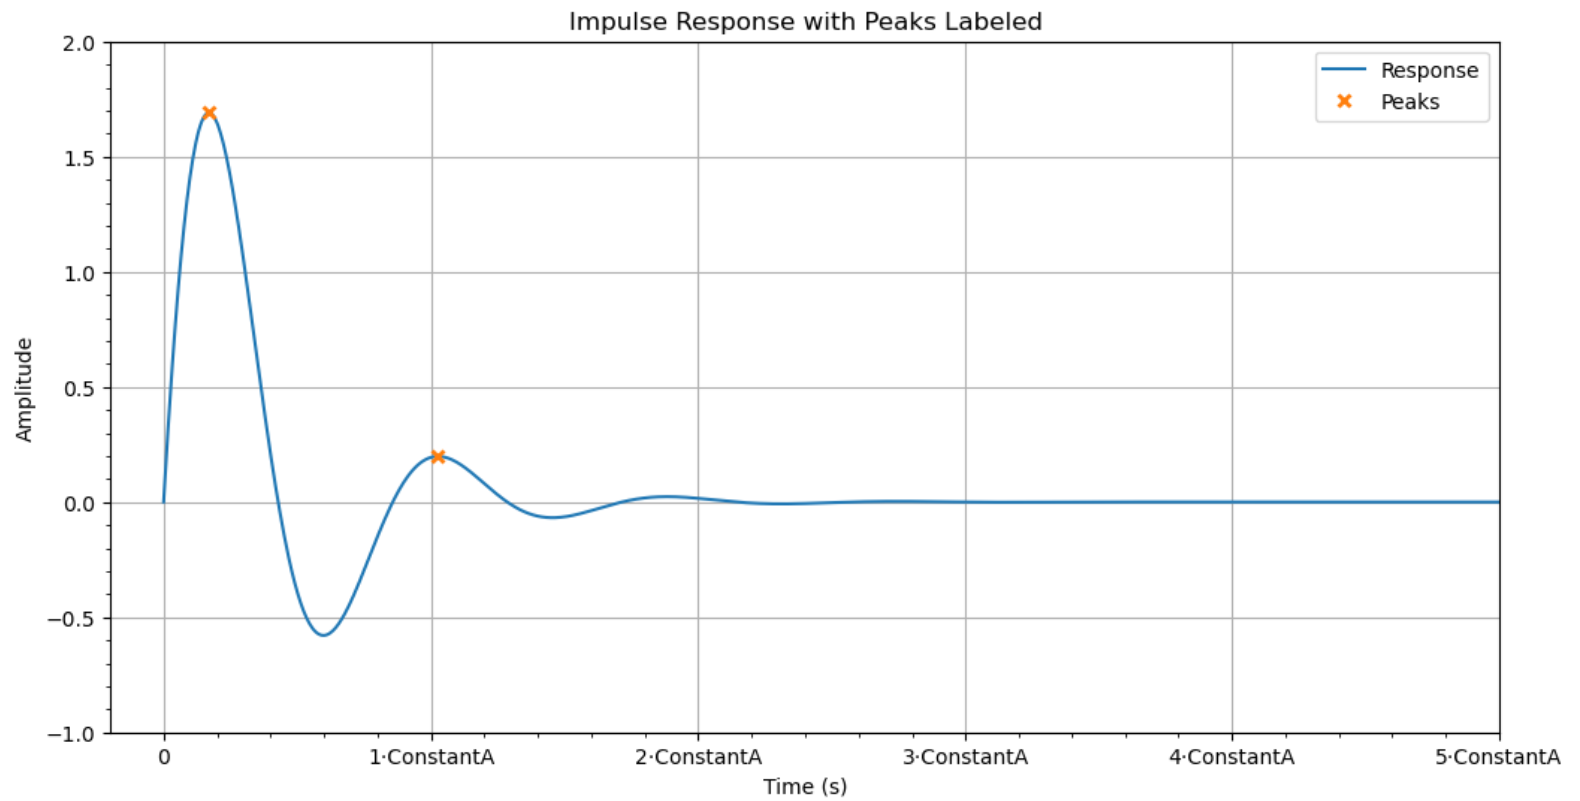

<span style="border-left: 4px solid #FFA500; padding: 5px; background-color: #FFF4E5; display: inline-block;">
    <strong>Q1.1</strong>
</span>

From the graph, obtain two characteristics in the response:
* Period of Damping
* Logarithmic Decrement Between Successive Peaks

>**answer**

* Period of Damping: 0.8 x Constant A = 44.8
* Logarithmic Decrement Between Successive Peaks: $ln(\frac{A_1}{A_2})=ln(\frac{1.7}{0.2}) = 2.14$

In [4]:
print(0.8*ConstantA)

44.800000000000004


In [5]:
print(np.log(1.7/0.2))

2.1400661634962708


<span style="border-left: 4px solid #FFA500; padding: 5px; background-color: #FFF4E5; display: inline-block;">
    <strong>Q1.2</strong>
</span>

From the Logarithmic Decrement Between Successive Peaks, calculate the damping ratio $\zeta$. Show steps in Markdown.

>**answer**

Suppose we denote Logarithmic Decrement as $\delta$,

$$\delta = \frac{2\pi\zeta}{\sqrt{1-\zeta^2}}$$

Re-arrange it and write $\zeta$ on the left hand side:

$$\zeta = \frac{\delta}{4\pi^2+\delta^2}$$

From Q1.1, we have $\delta = 2.14$, so

$$\zeta = \frac{2.14}{4\pi^2+2.14^2}=0.3224$$


In [6]:
2.14/np.sqrt(4*np.pi*np.pi+2.14**2)

0.32240465025006554

<span style="border-left: 4px solid #FFA500; padding: 5px; background-color: #FFF4E5; display: inline-block;">
    <strong>Q1.3</strong>
</span>

Next, based on Period of Damping and calculated $\zeta$, calculate the natural frequency $\omega_n$. Show steps in Markdown.

>**answer**

We known that Period of Damping is :
$$T_d = \frac{2\pi}{\omega_n\sqrt{1-\zeta^2}}$$

Re-arrange it and plug in values:

$$\omega_n= \frac{2\pi}{T_d\sqrt{1-\zeta^2}}$$

$$\omega_n= \frac{2\pi}{44.8\sqrt{1-0.3224^2}}=0.1482$$

In [7]:
2*np.pi/44.8/np.sqrt(1-0.3224**2)

0.14816094365367355

<span style="border-left: 4px solid #FFA500; padding: 5px; background-color: #FFF4E5; display: inline-block;">
    <strong>Q1.4</strong>
</span>

With calculated numders, type down the transfer function. 

>**answer**

We need to calculate $2\zeta\omega_n$ and $\omega_n^2$

In [8]:
zeta = 0.3224
w_n = 0.1482
print(2*zeta*w_n)
print(w_n**2)

0.09555936000000001
0.02196324


$$H(s) = \frac{20}{s^2+2\zeta\omega_n s+\omega_n^2}=\frac{20}{s^2+0.09556 s+0.02196}$$

<span style="border-left: 4px solid #FFA500; padding: 5px; background-color: #FFF4E5; display: inline-block;">
    <strong>Q1.5</strong>
</span>

In Python, plot the unit impulse response of your calculated transfer function. 

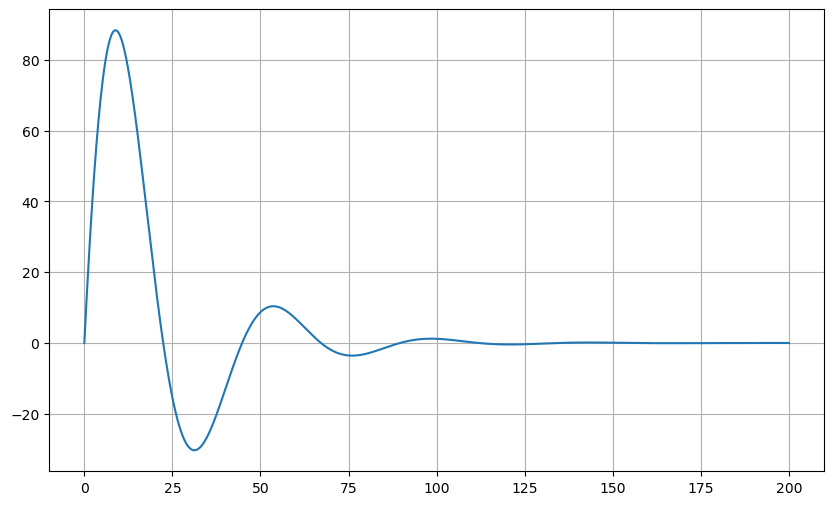

In [11]:
num = [20]
den = [1, 0.09556, 0.02196]
Hs = sig.lti(num, den)
t = np.linspace(0, 200, 1000)
_, y_impulse = sig.impulse(Hs, T=t)

plt.figure(figsize=(10, 6))
plt.plot(t, y_impulse)
plt.grid(True)

<div style="border-left: 4px solid #28a745; padding: 10px; background-color: #f9fff3; margin-top: 10px;">
  <h2 style="margin: 0;">Q 2: Step Response of 2nd Order System</h2>
</div>

Consider a 2nd order system in transfer function:

$$H(s) = \frac{10\times \omega_n^2}{s^2+2\zeta\omega_n s+\omega_n^2}$$

* the denominator is with unknown damping ratio $\zeta$ and natural frequency $\omega_n$

Its unit step response has these two characteristics:
* Percentage Overshoot (PO) is ConstantB\% (for example, if you ConstantB is 50, then PO is 50\%)
* Peak Time is 5 seconds


<span style="border-left: 4px solid #FFA500; padding: 5px; background-color: #FFF4E5; display: inline-block;">
    <strong>Q2.1</strong>
</span>

From the transfer function, directly answer the Steady State Value.

**answer**

with unit step input, the steady state value is just plugging $s=0$ into $H(s)$:

$$H(s=0)=\frac{10\times \omega_n^2}{0^2+2\zeta\omega_n \cdot 0+\omega_n^2}=\frac{10\times \omega_n^2}{\omega_n^2}=10$$

<span style="border-left: 4px solid #FFA500; padding: 5px; background-color: #FFF4E5; display: inline-block;">
    <strong>Q2.2</strong>
</span>

From the Percentage Overshoot, calculate the damping ratio $\zeta$. Show steps in Markdown.

>**answer**

$$PO = e^{\frac{\zeta\pi}{\sqrt{1-\zeta^2}}}\times 100\%$$

re-arrange, write $\zeta$ on the left hand side:

$$\zeta = -\frac{ln(\frac{PO}{100\%})}{\sqrt{\pi^2+ln^2(\frac{PO}{100\%})}}$$

My PO is 65\%, plug into:

In [15]:
ln_PO = np.log(65/100)

zeta = -ln_PO/np.sqrt(np.pi**2+ln_PO**2)
print(zeta)

0.13585123264427953


$$\zeta = 0.1358$$

<span style="border-left: 4px solid #FFA500; padding: 5px; background-color: #FFF4E5; display: inline-block;">
    <strong>Q2.3</strong>
</span>


Next, based on the Peak Time and calculated $\zeta$, calculate the natural frequency $\omega_n$. Show steps in Markdown.

>**answer**

$$t_p = \frac{\pi}{\omega_n\sqrt{1-\zeta^2}}$$

Re-arrange:
$$\omega_n = \frac{\pi}{t_p\sqrt{1-\zeta^2}}$$

Plug int values:

In [20]:
tp = 5
w_n = np.pi/5/np.sqrt(1-zeta**2)
print(w_n)

0.6341980233928982


$$\omega_n=0.6342$$

<span style="border-left: 4px solid #FFA500; padding: 5px; background-color: #FFF4E5; display: inline-block;">
    <strong>Q2.4</strong>
</span>

With calculated numders, type down the transfer function.

>**answer**

In [21]:
print(2*zeta*w_n)
print(w_n**2)

0.1723131664369817
0.40220713287545906


$$H(s) = \frac{4.02}{s^2+0.172 s+0.402}$$

<span style="border-left: 4px solid #FFA500; padding: 5px; background-color: #FFF4E5; display: inline-block;">
    <strong>Q2.5</strong>
</span>

In Python, plot the unit step response of your calculated transfer function. 

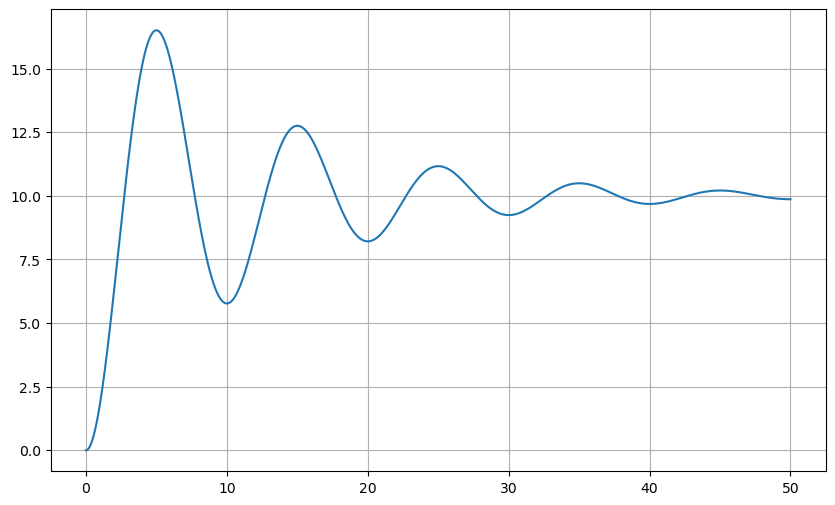

In [25]:
num = [4.02]
den = [1, 0.172, 0.402]
Hs = sig.lti(num, den)
t = np.linspace(0, 50, 1000)
_, y_step = sig.step(Hs, T=t)

plt.figure(figsize=(10, 6))
plt.plot(t, y_step)
plt.grid(True)

<div style="border-left: 4px solid #28a745; padding: 10px; background-color: #f9fff3; margin-top: 10px;">
  <h2 style="margin: 0;">Q 3: State Space Model</h2>
</div>

Consider a toy car motion in the 2D plane.

The state equations are as follows:

$$
\begin{aligned}
\dot{p}_x(t) &= v_x(t) \\
\dot{p}_y(t) &= v_y(t) \\
\dot{v}_x(t) &= -4\, p_x(t) - \, v_x(t) + 5\cos(\theta)\cdot u(t)  \\
\dot{v}_y(t) &= -3\, p_y(t) - \, v_y(t) + 5\sin(\theta)\cdot u(t) 
\end{aligned}
$$

- $p_x$, $p_y$: car's **position** (m) in x and y direction, respectively
- $v_x$, $v_y$: car's **velocity** (m/s) in x and y direction, respectively
- $\theta$ is an angle in rad. The value is calculated by `theta_rad = np.deg2rad(ConstantC/2)`
- Assume zero initial conditions for all

* State Vector:
$
\mathbf{x}(t) =
\begin{bmatrix}
p_x(t) \\
p_y(t) \\
v_x(t) \\
v_y(t)
\end{bmatrix}
$
* Input Vector:
$
\mathbf{u}(t) =
\begin{bmatrix}
u(t)
\end{bmatrix}
$
* Output Vector:
$
\mathbf{y}(t) =
\begin{bmatrix}
p_x(t) \\
p_y(t) \\
v_x(t) \\
v_y(t)
\end{bmatrix}
$

<span style="border-left: 4px solid #FFA500; padding: 5px; background-color: #FFF4E5; display: inline-block;">
    <strong>Q3.1</strong>
</span>

Type down the $A$ and $B$ matrices in state-space model

>**answer**

$$
A =
\begin{bmatrix}
0&0&1&0 \\
0&0&0&1 \\
-4&0&-1&0 \\
0&-3&0&-1
\end{bmatrix}
$$

$$
B =
\begin{bmatrix}
0\\
0 \\
5\cos(\theta)\\
5\sin(\theta)
\end{bmatrix}
$$

<span style="border-left: 4px solid #FFA500; padding: 5px; background-color: #FFF4E5; display: inline-block;">
    <strong>Q3.2</strong>
</span>

Type down the $C$ and $D$ matrices in state-space model

>**answer**

$$
C =
\begin{bmatrix}
1&0&0&0 \\
0&1&0&0 \\
0&0&1&0 \\
0&0&0&1
\end{bmatrix}
$$

$$
D =
\begin{bmatrix}
0\\
0 \\
0\\
0
\end{bmatrix}
$$

<span style="border-left: 4px solid #FFA500; padding: 5px; background-color: #FFF4E5; display: inline-block;">
    <strong>Q3.3, 3.4</strong>
</span>

Use Python to obtain the unit step response of the system, for 20 seconds.

Plot these figures separately:
* one figure showing X-direction position $p_x(t)$ versus time $t$.
* one figure showing Y-direction position $p_y(t)$ versus time $t$.
* one figure showing the 2D trajectory of the toy car. Use $p_x(t)$ as X-axis, use $p_y(t)$ as Y-axis

Dont forget to label your figures.

>**answer**

StateSpaceContinuous(
array([[ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.],
       [-4.,  0., -1.,  0.],
       [ 0., -3.,  0., -1.]]),
array([[0.        ],
       [0.        ],
       [4.93142801],
       [0.82523803]]),
array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]]),
array([[0.],
       [0.],
       [0.],
       [0.]]),
dt: None
)


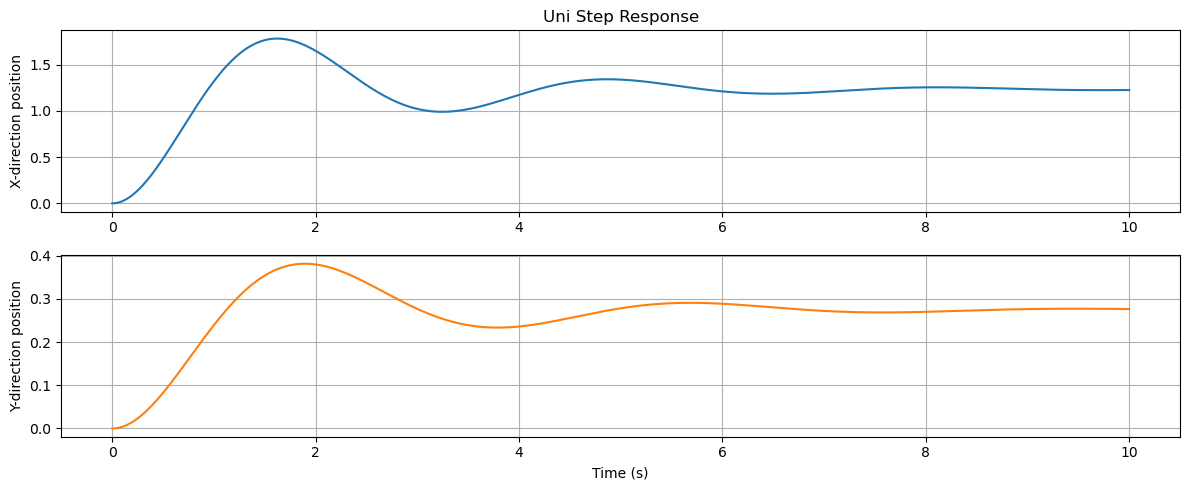

In [36]:
theta_rad = np.deg2rad(ConstantC/2)

A = np.array([[0.0, 0.0, 1.0, 0.0], [0.0, 0.0, 0.0, 1.0], [-4.0, 0.0, -1.0, 0.0], [0.0, -3.0, 0.0, -1.0]])
B = np.array([[0.0], [0.0], [5*np.cos(theta_rad)], [5*np.sin(theta_rad)]])
C = np.array([[1.0, 0.0, 0.0, 0.0], [0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 1.0, 0.0], [0.0, 0.0, 0.0, 1.0]])
D = np.array([[0.0], [0.0], [0.0], [0.0]]) 
SSModel = sig.lti(A, B, C, D)
print(SSModel)

# Impulse Response
t = np.linspace(0, 10, 1000)
_, y_out = sig.step(SSModel, T=t)

# Plotting
plt.figure(figsize=(12, 5))
# Position subplot
plt.subplot(2, 1, 1)
plt.plot(t, y_out[:, 0], color="tab:blue")
plt.ylabel('X-direction position')
plt.title('Uni Step Response')
plt.grid(True)

# Velocity subplot
plt.subplot(2, 1, 2)
plt.plot(t, y_out[:, 1], color="tab:orange")
plt.ylabel('Y-direction position')
plt.xlabel('Time (s)')
plt.grid(True)

plt.tight_layout()

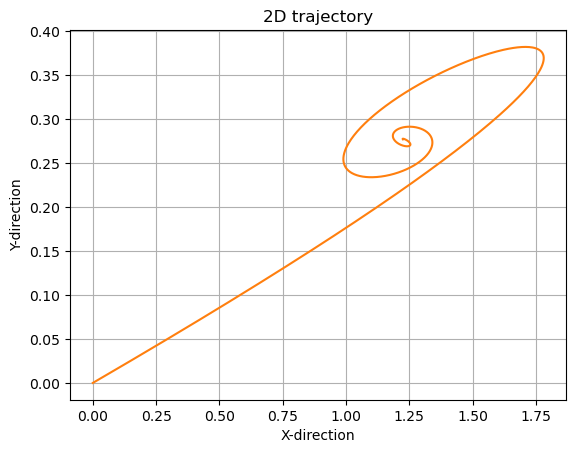

In [37]:
plt.plot(y_out[:, 0], y_out[:, 1], color="tab:orange")
plt.ylabel('Y-direction')
plt.xlabel('X-direction')
plt.title('2D trajectory')
plt.grid(True)

<span style="border-left: 4px solid #FFA500; padding: 5px; background-color: #FFF4E5; display: inline-block;">
    <strong>Q3.5</strong>
</span>

Print-out the eigenvalues of the $A$ matrix. Indicate the BIBO stability of the system.

>**answer**

In [38]:
print('Eigenvalues: ', np.linalg.eigvals(A))

Eigenvalues:  [-0.5+1.93649167j -0.5-1.93649167j -0.5+1.6583124j  -0.5-1.6583124j ]


It is stable

<div style="border-left: 4px solid #28a745; padding: 10px; background-color: #f9fff3; margin-top: 10px;">
  <h2 style="margin: 0;">Q 4: Discrete Time System</h2>
</div>

Given a discrete-time system described in a difference equation:

$$y[n] = x[n] + 0.8\, y[n-1] - \frac{ConstantD}{100}\, y[n-2] $$

<span style="border-left: 4px solid #FFA500; padding: 5px; background-color: #FFF4E5; display: inline-block;">
    <strong>Q4.1</strong>
</span>

Perform Z transform to the difference equation. 

>**answer**

$$Y(z) = X(z) + 0.8Y(z)z^{-1}-\frac{ConstantD}{100}\, Y(z)z^{-2} $$

<span style="border-left: 4px solid #FFA500; padding: 5px; background-color: #FFF4E5; display: inline-block;">
    <strong>Q4.2</strong></span>

Write down the transfer function in Z domain, $H(z)$. Make sure there is no positive powers of $z$ in the final expression

>**answer**

Re-arrange:
$$Y(z)- 0.8Y(z)z^{-1} +\frac{ConstantD}{100}\, Y(z)z^{-2} = X(z)  $$

$$\left( 1- 0.8z^{-1} +\frac{ConstantD}{100}z^{-2}\right) Y(z) = X(z)  $$

$$H(z) = \frac{Y(z)}{X(z)} = \frac{1}{1- 0.8z^{-1} +\frac{ConstantD}{100}\, z^{-2}}$$

<span style="border-left: 4px solid #FFA500; padding: 5px; background-color: #FFF4E5; display: inline-block;">
    <strong>Q4.3</strong></span>
    
* Calculate the roots of the denominator (poles) of the transfer function. 
* Exam if they are located within the unit cicle.
* Indicate the BIBO stability of the system

>**answer**


In [44]:
np.roots([1, -0.8, ConstantD/100])

array([0.4+0.77459667j, 0.4-0.77459667j])

roots are $0.4\pm 0.7746j$

In [45]:
np.sqrt(0.4**2+0.7746**2)

0.8717827481660784

Since $\sqrt{0.4^2+0.7746^2}=0.8717<1$, they are located inside the unit circle.

The system is BIBO stable

<span style="border-left: 4px solid #FFA500; padding: 5px; background-color: #FFF4E5; display: inline-block;">
    <strong>Q4.4</strong></span>

In Python, use `dstep` to plot the unit step response. Plot enough samples until the output is steady.

>**answer**

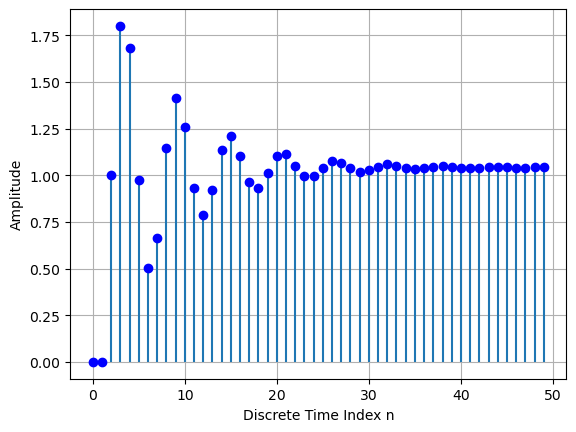

In [57]:
n_samples = 50
num_z = [1]
den_z = [1, -0.8, ConstantD/100]
Hz = sig.dlti(num_z, den_z)
_, y = sig.dstep(Hz, n=n_samples)

n = np.arange(n_samples)
plt.stem(n, np.squeeze(y), linefmt='tab:blue', markerfmt='bo', basefmt=' ', label='y[n]')
plt.xlabel('Discrete Time Index n')
plt.ylabel('Amplitude')
plt.grid(True)

<span style="border-left: 4px solid #FFA500; padding: 5px; background-color: #FFF4E5; display: inline-block;">
    <strong>Q4.5</strong>
</span>

* Read the steady-state value from your plot
* Calculate the theoretical steady-state value. 

    Recall the steady-state value of continuous $H(s)$ is just plug in $s=0$. Also we have the conversion: $z = e^{sT} $. Thus if we plug $z = e^{0T} =1 $ in to $H(z)$, we can get the theoretical one for steady-state value.

>**answer**

* Read from the plot, my steady state value is about 1.05
* Plug in $z=1$, I have:
$$H(z=1) = = \frac{1}{1- 0.8z^{-1} +\frac{ConstantD}{100}\, z^{-2}}=\frac{1}{1- 0.8 +\frac{ConstantD}{100}}$$

My Constant D is 76,

$$H(z) = \frac{1}{1-0.8+0.76}=1.042$$

<div style="border-left: 4px solid #28a745; padding: 10px; background-color: #f9fff3; margin-top: 10px;">
  <h2 style="margin: 0;">Submit in .pdf</h2>
</div>

<div style="border-left: 4px solid #28a745; padding: 10px; background-color: #f9fff3; margin-top: 10px;">
  <h2 style="margin: 0;">Make sure all your answer cells are rendered</h2>
</div>